In [26]:
import numpy as np
import tensorflow as tf
tf.enable_eager_execution()

In [27]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
], dtype = "float32")
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [28]:
y = np.array([
    [0],
    [0],
    [0],
    [1]
], dtype = "float32")
y

array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [29]:
w = np.array([[1],[2]], dtype = "float32")
w

array([[1.],
       [2.]], dtype=float32)

In [30]:
b = np.array([3], dtype = "float32")
b

array([3.], dtype=float32)

In [31]:
# (4,2)*(2,1) 내접이 같으므로 연산가능 -> 결과는 (4,1) 나옴
np.dot(X,w)

array([[0.],
       [2.],
       [1.],
       [3.]], dtype=float32)

In [32]:
# 각 행에 +b가 된다
np.dot(X,w)+b

array([[3.],
       [5.],
       [4.],
       [6.]], dtype=float32)

In [33]:
# h를 0~! 사이 범위로 변경하는 활성함수 선언
def sigmoid(h):
    return 1 / (1+np.exp(-h))

In [34]:
# X*W+b를 실행해서 예측값을 hypothesis에 대입
hypothesis = np.dot(X,w)+b
hypothesis

array([[3.],
       [5.],
       [4.],
       [6.]], dtype=float32)

In [35]:
# X*W+b를 실행해서 예측값을 hypothesis에 대입하고 활성함수를 이용해서
# 값의 범위를 0~1 사이로 변경
hypothesis = sigmoid(np.dot(X,w)+b)
hypothesis


array([[0.95257413],
       [0.9933072 ],
       [0.98201376],
       [0.9975274 ]], dtype=float32)

In [36]:
# 예측값 - 실제값
(hypothesis - y)

array([[ 0.95257413],
       [ 0.9933072 ],
       [ 0.98201376],
       [-0.00247258]], dtype=float32)

In [37]:
# X의 줄칸을 반대로 전환
X.T

array([[0., 0., 1., 1.],
       [0., 1., 0., 1.]], dtype=float32)

In [38]:
# X의 줄칸을 반대로 전환하고 0번째 줄을 리턴
# X의 줄칸을 반대로 전환했기 때문에 실제로는 0번째 칸이 리턴됨
X.T[0]

array([0., 0., 1., 1.], dtype=float32)

In [39]:
# 이차원 배열인 (hypothesis-y) 와 변환하기 위해서
# X.T[0] 를 2차원 배열로 변환
X_col_2d1 = X.T[0].reshape(1,-1)
X_col_2d1

array([[0., 0., 1., 1.]], dtype=float32)

In [40]:
# w1의 수정값
w1_gred = 1/4*np.sum(np.dot(X_col_2d1,(hypothesis-y)))
print("w1_gred: ",w1_gred)

w1_gred:  0.24488529562950134


In [41]:
# X의 줄칸을 반대로 전환하고 1번째 줄을 리턴
# X의 줄칸을 반대로 전환했기 때문에 실제로는 1번째 칸이 리턴됨
X.T[1]

array([0., 1., 0., 1.], dtype=float32)

In [42]:
# 이차원 배열인 (hypothesis-y)와 변환하기 위해서
# X.T[1]를 2차원 배열로 변환
X_col_2d2 = X.T[1].reshape(1,-1)
X_col_2d2

array([[0., 1., 0., 1.]], dtype=float32)

In [43]:
# w2의 수정값
w2_gred = 1/4*np.sum(np.dot((hypothesis-y),X_col_2d2))
print("w2_gred: ",w2_gred)

w2_gred:  1.4627113342285156


In [44]:
# b의 수정값
b_gred = 1/4 * np.sum(hypothesis-y)
print("b_gred: ", b_gred)

b_gred:  0.731355607509613


In [45]:
# learning rate
learning_rate = 0.1

# 100번 반복해서 오차 제곱의 합이 0으로 수렴되는 w와 b를 찾음
for i in range(100):
    for j in range(2):
        # 예측값을 hypothesis에 대입
        hypothesis = sigmoid(np.dot(X,w)+b)
        print("hypothesis: ", hypothesis)
        # 오차를 계산
        cost = -1/4*(y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis))
        print("cost: ", cost)
        # X의 줄 칸을 변경하여 j번째 칸을 리턴 2차원 배열로 생성
        X_col_2d = X.T[j].reshape(1,-1)
        # w의 기울기를 계산
        w_gred = 1/4*np.sum(np.dot(X_col_2d,(hypothesis-y)))
        print("w_{}gred:{}".format(i,w_gred))
        # w를 업데이트
        w[j] = w[j] - learning_rate*w_gred
        print("w{}:{}".format(j,w))
        # b의 기울기를 계산
        b_gred = 1/4 * np.sum(hypothesis-y)
        print("b{}_gred:{}".format(i,b_gred))
        # b를 업데이트
        b = b-learning_rate*b_gred
        print("b:{}".format(b))

hypothesis:  [[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]]
cost:  [[7.6214689e-01]
 [1.2516798e+00]
 [1.0045371e+00]
 [6.1891036e-04]]
w_0gred:0.24488529562950134
w0:[[0.9755115]
 [2.       ]]
b0_gred:0.731355607509613
b:[2.9268644]
hypothesis:  [[0.94915855]
 [0.9928029 ]
 [0.9802059 ]
 [0.99727446]]
cost:  [[7.4476081e-01]
 [1.2335199e+00]
 [9.8059279e-01]
 [6.8231567e-04]]
w_0gred:0.2475193440914154
w1:[[0.9755115]
 [1.9752481]]
b0_gred:0.7298604249954224
b:[2.8538783]
hypothesis:  [[0.94551885]
 [0.9920699 ]
 [0.97873896]
 [0.99699557]]
cost:  [[7.2747511e-01]
 [1.2092724e+00]
 [9.6271980e-01]
 [7.5223850e-04]]
w_1gred:0.24393363296985626
w0:[[0.9511181]
 [1.9752481]]
b1_gred:0.7283308506011963
b:[2.7810452]
hypothesis:  [[0.94164294]
 [0.99147594]
 [0.9766187 ]
 [0.9966897 ]]
cost:  [[7.1029371e-01]
 [1.1912156e+00]
 [9.3895477e-01]
 [8.2895352e-04]]
w_1gred:0.24704140424728394
w1:[[0.9511181]
 [1.950544 ]]
b1_gred:0.7266068458557129
b:[2.7083845]
hypothesis:  [[0.93751

 [0.05962938]]
w_30gred:0.06814106553792953
w0:[[0.43821695]
 [1.372626  ]]
b30_gred:0.3381878137588501
b:[-0.53979117]
hypothesis:  [[0.36823615]
 [0.696954  ]
 [0.47462824]
 [0.7809227 ]]
cost:  [[0.11480992]
 [0.29846767]
 [0.16091228]
 [0.06181977]]
w_30gred:0.11946918070316315
w1:[[0.43821695]
 [1.360679  ]]
b30_gred:0.33018529415130615
b:[-0.5728097]
hypothesis:  [[0.36058873]
 [0.6873737 ]
 [0.46640256]
 [0.77313286]]
cost:  [[0.11180186]
 [0.29068667]
 [0.15702838]
 [0.06432609]]
w_31gred:0.059883855283260345
w0:[[0.43222857]
 [1.360679  ]]
b31_gred:0.3218744397163391
b:[-0.60499716]
hypothesis:  [[0.35320127]
 [0.6804155 ]
 [0.45691496]
 [0.76636714]]
cost:  [[0.10893003]
 [0.2851834 ]
 [0.15262234]
 [0.06652348]]
w_31gred:0.11169566214084625
w1:[[0.43222857]
 [1.3495095 ]]
b31_gred:0.3142247200012207
b:[-0.63641965]
hypothesis:  [[0.34605634]
 [0.67108357]
 [0.44912887]
 [0.7586548 ]]
cost:  [[0.10618352]
 [0.2779879 ]
 [0.14906359]
 [0.06905212]]
w_32gred:0.05194590985774994

b68_gred:0.07133893668651581
b:[-1.7351612]
hypothesis:  [[0.1499286 ]
 [0.38618928]
 [0.23017636]
 [0.5161161 ]]
cost:  [[0.04060872]
 [0.12201717]
 [0.06539845]
 [0.16535589]]
w_68gred:-0.024423658847808838
w1:[[0.5278456]
 [1.2742445]]
b68_gred:0.07060258090496063
b:[-1.7422215]
hypothesis:  [[0.14903098]
 [0.3850952 ]
 [0.2289277 ]
 [0.5149627 ]]
cost:  [[0.04034489]
 [0.12157197]
 [0.06499329]
 [0.16591522]]
w_69gred:-0.06402740627527237
w0:[[0.53424835]
 [1.2742445 ]]
b69_gred:0.06950414180755615
b:[-1.7491719]
hypothesis:  [[0.14815168]
 [0.3834507 ]
 [0.22883107]
 [0.51482594]]
cost:  [[0.04008671]
 [0.12090424]
 [0.06496195]
 [0.1659816 ]]
w_69gred:-0.025430843234062195
w1:[[0.53424835]
 [1.2767876 ]]
b69_gred:0.06881484389305115
b:[-1.7560533]
hypothesis:  [[0.14728533]
 [0.38242552]
 [0.22761898]
 [0.5137422 ]]
cost:  [[0.03983258]
 [0.12048891]
 [0.06456933]
 [0.16650842]]
w_70gred:-0.06465969979763031
w0:[[0.5407143]
 [1.2767876]]
b70_gred:0.06776800751686096
b:[-1.7628301

In [46]:
# Gradient Decent로 계산한 w
w

array([[0.7401471],
       [1.3791031]], dtype=float32)

In [47]:
# Gradient Decent로 계산한 b
b

array([-2.0687358], dtype=float32)

In [48]:
# X에 w를 곱하고 b를 추가
np.dot(X,w)+b

array([[-2.0687358 ],
       [-0.6896328 ],
       [-1.3285887 ],
       [ 0.05051446]], dtype=float32)

In [49]:
# X에 w를 곱하고 b를 추가한 후 활성함수를 이용해서 데이터의 범위를 0 ~ 1로 설정
predict = sigmoid(np.dot(X,w)+b)
predict

array([[0.11217288],
       [0.33411476],
       [0.2093929 ],
       [0.51262593]], dtype=float32)

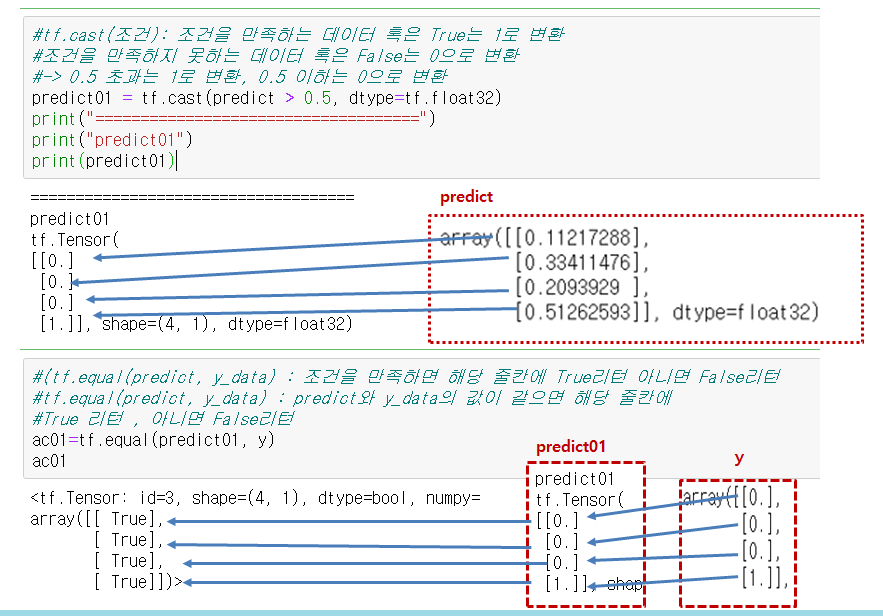

In [51]:
# tf.cast(조건): 조건을 만족하는 데이터 혹은 True는 1로 변환
# 조건을 만족하지 못하는 데이터 혹은 False는 0으로 변환
# -> 0.5 초과는 1로 변환, 0.5 이하는 0으로 변환
predict01 = tf.cast(predict > 0.5, dtype = tf.float32)
print("====================")
print("predict01")
print(predict01)

predict01
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [1.]], shape=(4, 1), dtype=float32)


In [52]:
# tf.equal(predict, y_data): 조건을 만족하려면 해당 줄칸에 True 리턴 아니면 False 리턴
# tf.equal(predict, y_data): predict와 y_data의 값이 같으면 해당 줄칸에
# True 리턴, 아니면 False 리턴
ac01 = tf.equal(predict01, y)
ac01

<tf.Tensor: id=3, shape=(4, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True]])>

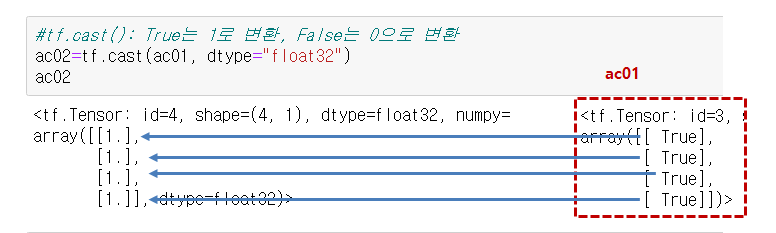

In [54]:
# tf.cast(): True는 1로 변환, False는 0으로 변환
ac02 = tf.cast(ac01, dtype = "float32")
ac02

<tf.Tensor: id=5, shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [55]:
# tf.reduce_mean(): 변환한 0과 1의 합을 구한 후에 데이터의 개수로 나눔
ac03 = tf.reduce_mean(ac02)
ac03

<tf.Tensor: id=7, shape=(), dtype=float32, numpy=1.0>

In [56]:
# 정확도를 계산
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict01, y), dtype = tf.float32))
print("====================")
print("accuracy")
print(accuracy.numpy())

accuracy
1.0


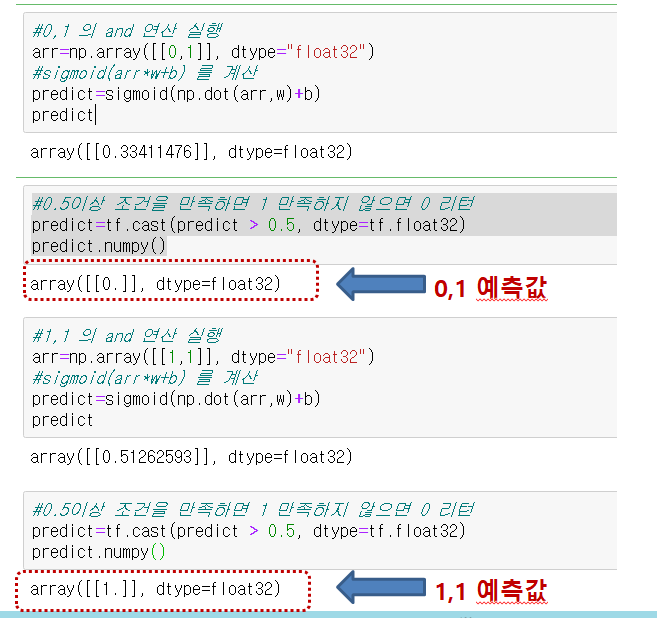

In [57]:
# 0,1의 and 연산 실행
arr = np.array([[0,1]], dtype = "float32")
# sigmoid(arr*w+b)를 계산
predict = sigmoid(np.dot(arr,w)+b)
predict

array([[0.33411476]], dtype=float32)

In [58]:
# 0.5 이상 조건을 만족하려면 1, 만족하지 않으면 0 리턴
predict = tf.cast(predict > 0.5, dtype = tf.float32)
predict.numpy()

array([[0.]], dtype=float32)

In [59]:
# 1, 1의 and 연산 실행
arr = np.array([[1,1]], dtype = "float32")
# sigmoid(Arr*w+b)를 계산
predict = sigmoid(np.dot(arr,w)+b)
predict

array([[0.51262593]], dtype=float32)

In [60]:
# 0.5 이상 조건을 만족하려면 1, 만족하지 않으면 0 리턴
predict = tf.cast(predict > 0.5, dtype = tf.float32)
predict.numpy()

array([[1.]], dtype=float32)